In [1]:
import numpy as np
import scipy.sparse as sp
from sklearn.datasets import load_svmlight_file
from oracle import Oracle, make_oracle
import scipy as sc
from methods import *
import matplotlib.pyplot as plt

In [2]:
orac = make_oracle('a1a.txt')
x, y = load_svmlight_file('a1a.txt', zero_based=False)
m = x[0].shape[1] + 1

Посмотрим, как ведёт себя время работы и колчество вызовов оракула L-BFGS метода в зависимости от history size на датасете a1a.

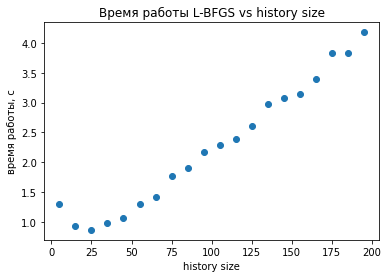

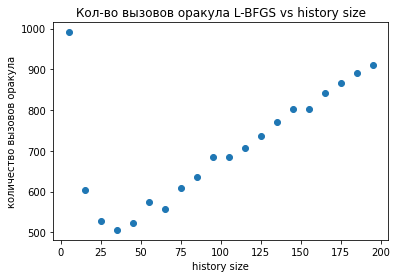

In [9]:
w0 = np.zeros(m).reshape((-1, 1))
ls = list(range(5, 200, 10))
times = []
orac_calls = []
for l in ls:
    optimizer = OptimizeLBFGS(l)
    optimizer(orac, w0)
    times.append(optimizer.times[-1])
    orac_calls.append(optimizer.orac_calls[-1])

plt.plot(ls, times, 'o')
plt.xlabel('history size')
plt.ylabel('время работы, с')
plt.title('Время работы L-BFGS vs history size')
plt.show()

plt.plot(ls, orac_calls, 'o')
plt.xlabel('history size')
plt.ylabel('количество вызовов оракула')
plt.title('Кол-во вызовов оракула L-BFGS vs history size')
plt.show()

Из графиков видно, что оптимальный размер history size в районе 25

In [10]:
true_val = sc.optimize.minimize(lambda w: orac.value(w), w0).fun
true_val

0.29787605181219556

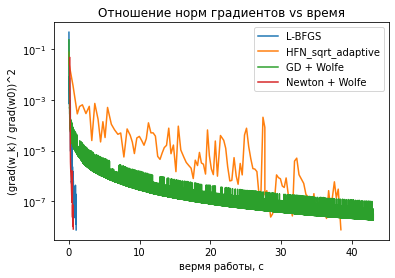

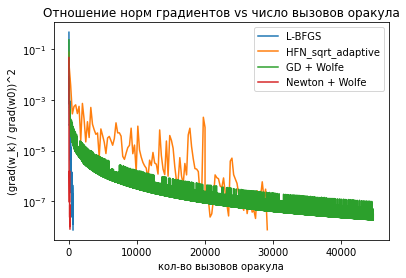

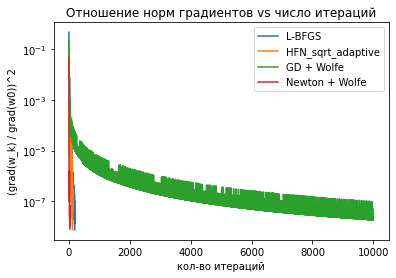

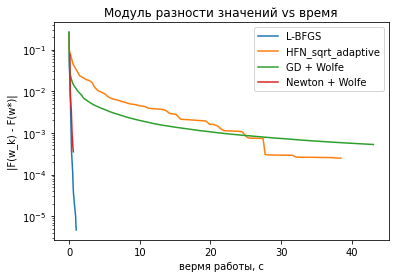

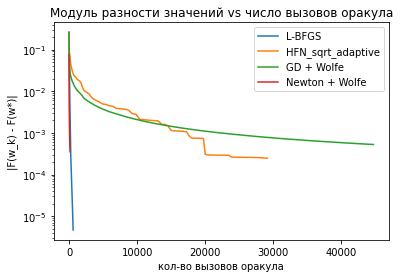

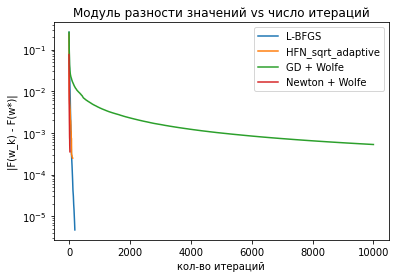

In [13]:
def plotter(oracle, w0, true_val):
    optimizer = OptimizeHFN()

    rel_errs = []
    vals = []
    times = []
    oracle_calls = []
    n_its = []

    labels = ['L-BFGS', 'HFN_sqrt_adaptive', 'GD + Wolfe', 'Newton + Wolfe']

    n = len(labels)
    
    optimizer = OptimizeLBFGS(l=15)
    point = optimizer(oracle, w0)
    rel_errs.append(optimizer.rel_errs)
    vals.append(optimizer.values)
    times.append(optimizer.times)
    oracle_calls.append(optimizer.orac_calls)
    n_its.append(optimizer.n_iter)
    
    optimizer = OptimizeHFN()
    point = optimizer(oracle, w0, 'sqrt_adaptive')
    rel_errs.append(optimizer.rel_errs)
    vals.append(optimizer.values)
    times.append(optimizer.times)
    oracle_calls.append(optimizer.orac_calls)
    n_its.append(optimizer.n_iter)
    
    optimizer = OptimizeGD()
    point = optimizer(oracle, w0, WolfeLineSearch())
    rel_errs.append(optimizer.rel_errs)
    vals.append(optimizer.values)
    times.append(optimizer.times)
    oracle_calls.append(optimizer.orac_calls)
    n_its.append(optimizer.n_iter)

    optimizer = OptimizeNewton()
    point = optimizer(oracle, w0, WolfeLineSearch())
    rel_errs.append(optimizer.rel_errs)
    vals.append(optimizer.values)
    times.append(optimizer.times)
    oracle_calls.append(optimizer.orac_calls)
    n_its.append(optimizer.n_iter)

    plt.title('Отношение норм градиентов vs время')
    for i in range(n):
        plt.plot(times[i], rel_errs[i], label=labels[i])
    plt.legend()
    plt.yscale('log')
    plt.xlabel('вермя работы, с')
    plt.ylabel('(grad(w_k) / grad(w0))^2')
    plt.show()

    plt.title('Отношение норм градиентов vs число вызовов оракула')
    for i in range(n):
        plt.plot(oracle_calls[i], rel_errs[i], label=labels[i])
    plt.legend()
    plt.yscale('log')
    plt.xlabel('кол-во вызовов оракула')
    plt.ylabel('(grad(w_k) / grad(w0))^2')
    plt.show()

    plt.title('Отношение норм градиентов vs число итераций')
    for i in range(n):
        plt.plot(list(range(1, n_its[i] + 1)), rel_errs[i], label=labels[i])
    plt.legend()
    plt.yscale('log')
    plt.xlabel('кол-во итераций')
    plt.ylabel('(grad(w_k) / grad(w0))^2')
    plt.show()

    plt.title('Модуль разности значений vs время')
    for i in range(n):
        plt.plot(times[i], abs(np.array(vals[i]) - true_val), label=labels[i])
    plt.legend()
    plt.yscale('log')
    plt.xlabel('вермя работы, с')
    plt.ylabel('|F(w_k) - F(w*)|')
    plt.show()

    plt.title('Модуль разности значений vs число вызовов оракула')
    for i in range(n):
        plt.plot(oracle_calls[i], abs(np.array(vals[i]) - true_val), label=labels[i])
    plt.legend()
    plt.yscale('log')
    plt.xlabel('кол-во вызовов оракула')
    plt.ylabel('|F(w_k) - F(w*)|')
    plt.show()

    plt.title('Модуль разности значений vs число итераций')
    for i in range(n):
        plt.plot(list(range(1, n_its[i] + 1)), abs(np.array(vals[i]) - true_val), label=labels[i])
    plt.legend()
    plt.yscale('log')
    plt.xlabel('кол-во итераций')
    plt.ylabel('|F(w_k) - F(w*)|')
    plt.show()
    
plotter(orac, w0, true_val)

Видим, что L-BFGS практически не уступает методу Ньютона и его hessian-free модификации по скорости сходмости, но при этом не требует никакого знания о гессиане.

Проделаем аналогичные вычисления на breast-cancer_scale датасете.

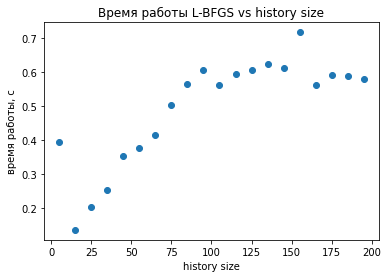

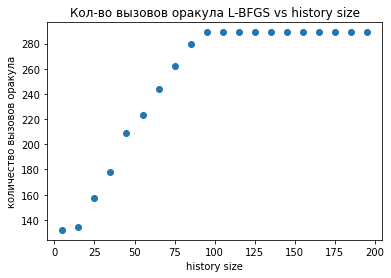

In [15]:
orac = make_oracle('breast-cancer_scale.txt')
x, y = load_svmlight_file('breast-cancer_scale.txt', zero_based=False)
m = x[0].shape[1] + 1

w0 = np.zeros(m).reshape((-1, 1))
ls = list(range(5, 200, 10))
times = []
orac_calls = []
for l in ls:
    optimizer = OptimizeLBFGS(l)
    optimizer(orac, w0)
    times.append(optimizer.times[-1])
    orac_calls.append(optimizer.orac_calls[-1])

plt.plot(ls, times, 'o')
plt.xlabel('history size')
plt.ylabel('время работы, с')
plt.title('Время работы L-BFGS vs history size')
plt.show()

plt.plot(ls, orac_calls, 'o')
plt.xlabel('history size')
plt.ylabel('количество вызовов оракула')
plt.title('Кол-во вызовов оракула L-BFGS vs history size')
plt.show()

Кажется, что тут оптимальный размер истории около 15

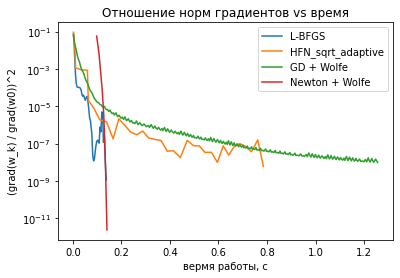

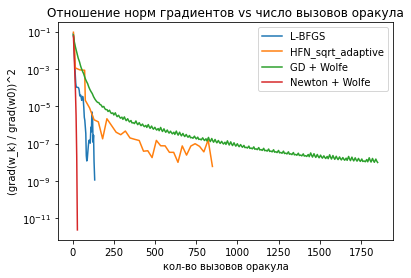

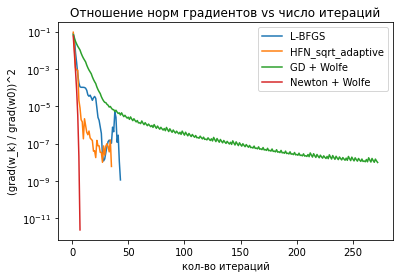

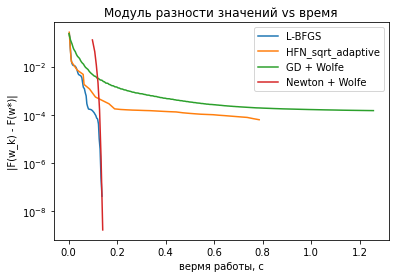

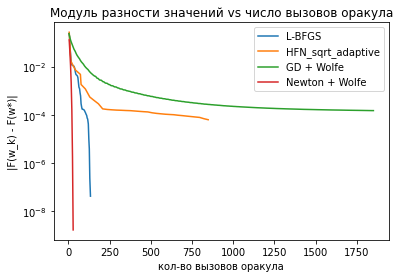

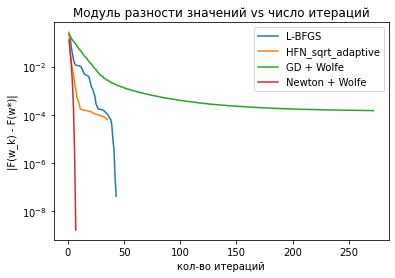

In [16]:
true_val = sc.optimize.minimize(lambda w: orac.value(w), w0).fun
plotter(orac, w0, true_val)

Эта серия графиков также подтверждает уже сделанные выводы.